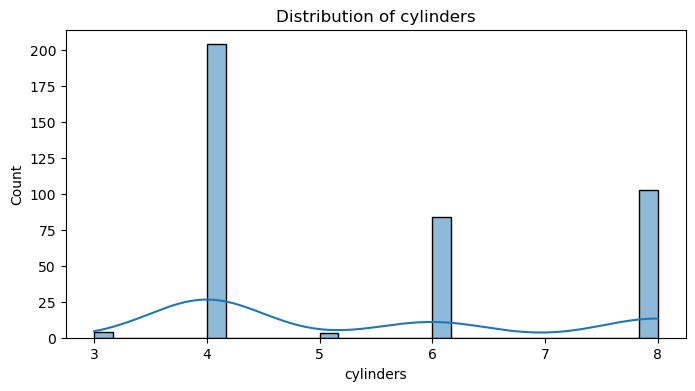

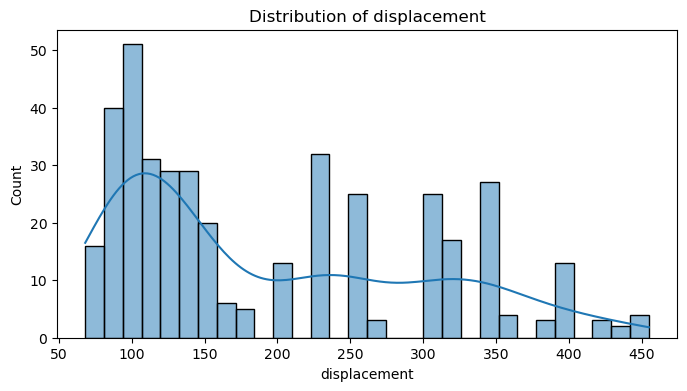

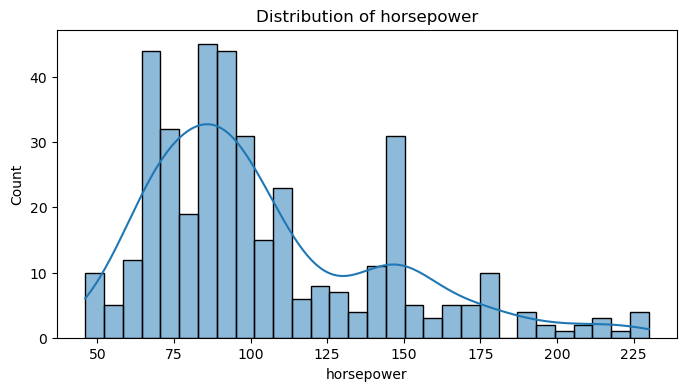

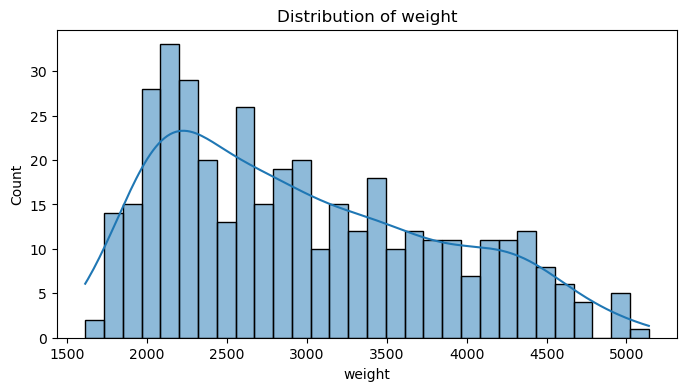

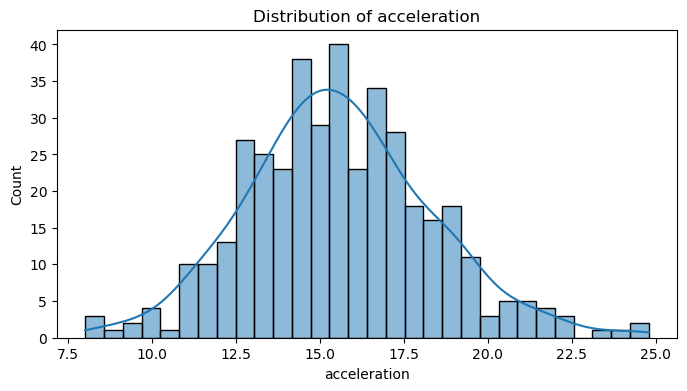

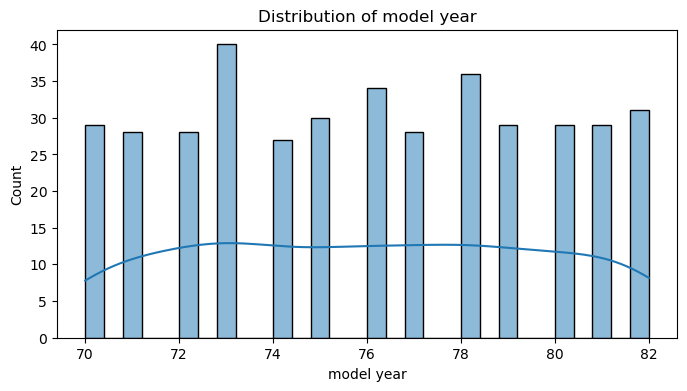

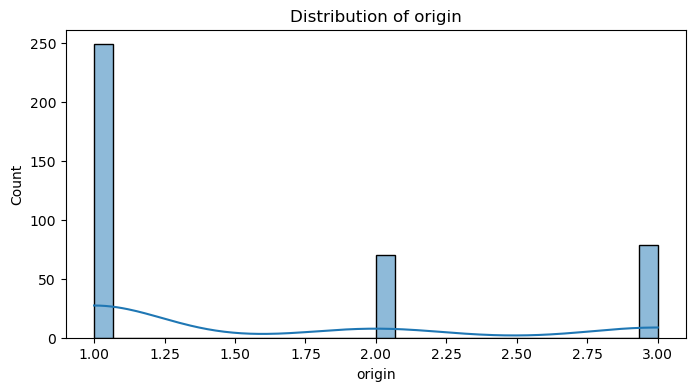

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df = pd.read_csv("auto-mpg.csv")

# Convert 'horsepower' to numeric, coerce errors to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Select numeric columns except 'mpg'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('mpg')  # Exclude mpg

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


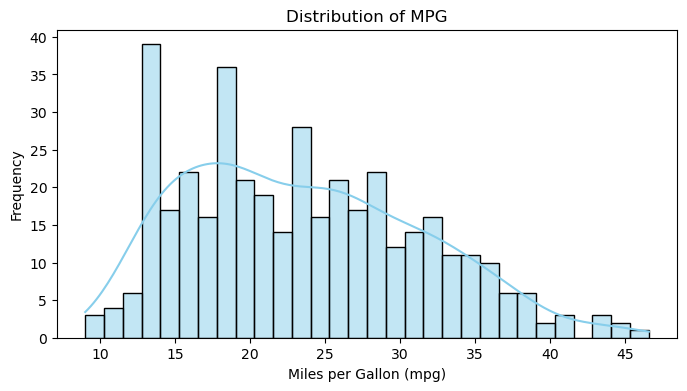

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df

plt.figure(figsize=(8, 4))
sns.histplot(df['mpg'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Frequency')
plt.show()


In [ ]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

skewness = df[numeric_cols].skew()
print(skewness)


mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64


In [ ]:
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a copy to avoid modifying original df
df_log = df.copy()

# Apply log transformation (add 1 to avoid log(0))
for col in numeric_cols:
    if (df_log[col] <= 0).any():
        # Skip columns with non-positive values
        continue
    df_log[col] = np.log(df_log[col])

# Calculate skewness after log transform
skewness_log = df_log[numeric_cols].skew()
print("Skewness after log transform:\n", skewness_log)


Skewness after log transform:
 mpg            -0.136494
cylinders       0.367622
displacement    0.226003
horsepower      0.370148
weight          0.156304
acceleration   -0.359504
model year     -0.048484
origin          0.736292
dtype: float64
